# **ML project: Predicting car fuel efficiency**

In [1]:
import pandas as pd
import numpy as np

## 1. Data preparation

In [2]:
df = pd.read_csv("car_fuel_efficiency.csv")

In [3]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


### using only specific columns

In [4]:
df.copy()
df_selected  =  ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']
df = df[df_selected]

In [5]:
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


## 2. Exploratory data analysis (EDA)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

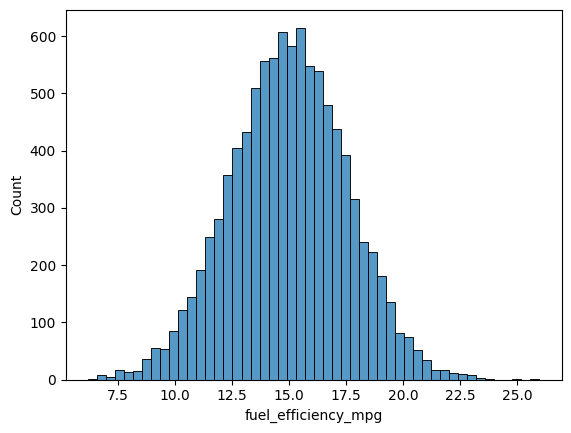

In [7]:
sns.histplot(df.fuel_efficiency_mpg, bins = 50)

From looking at the df.head(), it appears horsepower has missing values but it is not yet known whether this exist for all columns. so missing values are checked.

In [9]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

horsepower does indeed have 708 missing values. so missing values are filled in using fillNA()

In [11]:
# checking for the median horse power

median_hp = df['horsepower'].median()
median_hp

np.float64(149.0)

## Preparing and splitting the dataset

- Dataset is shuffled (the filtered one as created above), using seed 42 to maintain replication.
- Data is splitted into train/val/test sets, with 60%/20%/20% distribution.

In [13]:
## setting the percentage of distribution

n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

n_val, n_test, n_train

(1940, 1940, 5824)

In [14]:
#Next, is to create the boundaries for the split using the index location. 

df_train = df.iloc[n_train:]
df_val = df.iloc[n_train:n_train + n_val]
df_test = df.iloc[n_train + n_val:]

In [16]:
#Reshuffling the data for representation, such that we have a proper mix of data across all the splitted dataset.

idx = np.arange(n)

np.random.seed(42) #this ensures the same set of random data is generated for each splitted set (train,val, or test)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

In [17]:
len(df_train), len(df_val), len(df_test)

(5824, 1940, 1940)

In [18]:
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943
7506,160,141.0,2741.170484,2019,16.298377
8795,230,155.0,2471.880237,2017,18.591822
1688,150,206.0,3748.164469,2015,11.818843
6217,300,111.0,2135.716359,2006,19.402209


In [19]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)

In [20]:
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,220,144.0,2535.887591,2009,16.642943
1,160,141.0,2741.170484,2019,16.298377
2,230,155.0,2471.880237,2017,18.591822
3,150,206.0,3748.164469,2015,11.818843
4,300,111.0,2135.716359,2006,19.402209


In [21]:
y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_val =  np.log1p(df_val.fuel_efficiency_mpg.values)
y_test =  np.log1p(df_test.fuel_efficiency_mpg.values)

In [22]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [23]:
len(y_train)

5824

## 3. Fixing missing values, training a linear reg model, validation and RMSE.

### **Fixing NAs with options and training**

In [110]:
#option 1, fill na with zero
df_train_zero = df_train.copy() #for filling with zeros
df_train_mean = df_train.copy() #for filling with mean
df_train_zero['horsepower'] = df_train_zero['horsepower'].fillna(0)

#### **Option 1, filling with zeros and training a linear reg model**

In [27]:
#linear reg model for filling with zeros
def train_linear_regression(X, y):
    pass

In [28]:
X = [[148, 24, 1385], 
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185], 
    [172, 25, 201],
    [413, 11, 86],
    [38, 54, 185], 
    [142, 25, 431],
    [453, 31, 86]]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [29]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [30]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X) #gram matrix
    XTX_inv = np.linalg.inv(XTX)  ##calculates inverse of the gram matrix
    w_full = XTX_inv.dot(X.T).dot(y)

    #w_full  - Complete weight vector including bias
    # w0 = w_full[0]  - The bias term (intercept)
    # w = w_full[1:]  - The feature weights (slopes)
    
    return w_full[0], w_full[1:]

In [31]:
train_linear_regression(X,y)

(np.float64(25844.754055766833),
 array([ -16.08906468, -199.47254894,   -1.22802883]))

In [111]:
X_train1 = df_train_zero.values

In [112]:
w0, w = train_linear_regression(X_train1, y_train)

In [113]:
y_pred = w0 + X_train1.dot(w)
y_pred

array([2.90981589, 2.84278709, 2.93310627, ..., 2.92329662, 3.00305539,
       2.94404905], shape=(5824,))

<Axes: ylabel='Count'>

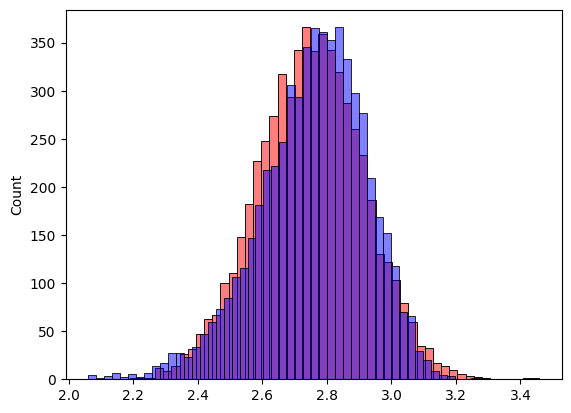

In [108]:
sns.histplot(y_pred, color = 'red', alpha = 0.5, bins = 50)
sns.histplot(y_train, color = 'blue', alpha = 0.5, bins = 50)

#### **RMSE - Root mean squared error** 

In [114]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [115]:
rmse(y_train, y_pred)
round(rmse(y_train, y_pred), 3) 

np.float64(0.039)

#### then validating model in option 1, and checking RMSE

In [43]:
X_train1 = df_train_zero.values
w0, w = train_linear_regression(X_train1, y_train)
y_pred = w0 + X_train1.dot(w)

In [116]:
def prepare_X(df):
    df_num = df_val.copy()
    df_num["horsepower"] = df_num['horsepower'].fillna(0)
    X = df_num.values
    return X

In [117]:
X_val1 = prepare_X(df_val)
y_pred = w0 + X_val1.dot(w)

rmse(y_val, y_pred)
round(rmse(y_val, y_pred), 3) ##shows the difference by which your predictions are off from the target value. 
                    ## in this case, the difference btw y_validation targets in the original data, and the predicted y values for the validation dataset.

np.float64(0.04)

#### **Option 2, filling with mean.**

In [83]:
df_train_mean = df_train.copy() #for filling with mean
mean_hp = df_train_mean['horsepower'].mean()

df_train_mean['horsepower'] = df_train_mean['horsepower'].fillna(mean_hp)

In [84]:
df_train_mean.isna().sum()

engine_displacement    0
horsepower             0
vehicle_weight         0
model_year             0
dtype: int64

In [87]:
X_train2 = df_train_mean.values

In [88]:
w0, w = train_linear_regression(X_train2, y_train) ##NB, train_linear_regression model has already been defined in cell [30]

In [118]:
y_pred_wtmean = w0 + X_train2.dot(w)
y_pred_wtmean

array([2.90981589, 2.84278709, 2.93310627, ..., 2.92329662, 3.00305539,
       2.94404905], shape=(5824,))

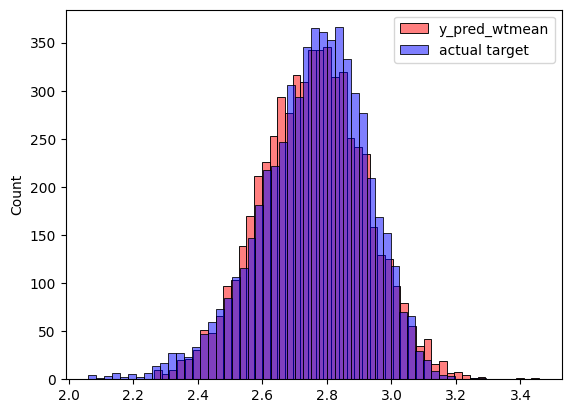

In [95]:
sns.histplot(y_pred_wtmean, color = 'red', alpha = 0.5, bins = 50, label = 'y_pred_wtmean')
sns.histplot(y_train, color = 'blue', alpha = 0.5, bins = 50, label = 'actual target')
plt.legend()
plt.show()

The histogram appears to have three colors instead of two because Seaborn (and Matplotlib) will automatically assign a third color to the overlapping region of the two histograms. When you plot two histograms with transparency (alpha < 1), the area where the red and blue bars overlap will be shown as a blend of the two colors (often purple).

#### **RMSE - Root mean squared error for filled mean** 

In [119]:
# Based on training data 
rmse(y_train, y_pred_wtmean)
round(rmse(y_train, y_pred_wtmean), 3) 

np.float64(0.038)

In [120]:
#based on val part
X_val2 = prepare_X(df_val) #prepare_X already defined, and there was no need to fillna using mean.
y_pred = w0 + X_val2.dot(w) 

rmse(y_val, y_pred)
round(rmse(y_val, y_pred), 3)

np.float64(0.04)

## 4. Training a regularised linear regression

In [121]:
df_train['horsepower'] = df_train['horsepower'].fillna(0)
df_val['horsepower'] = df_val['horsepower'].fillna(0)
df_test['horsepower'] = df_test['horsepower'].fillna(0)

In [122]:
df_train.isna().sum()

engine_displacement    0
horsepower             0
vehicle_weight         0
model_year             0
dtype: int64

In [123]:
X_train = df_train.values

In [124]:
w0, w = train_linear_regression(X_train, y_train)

In [128]:
def prepare_Xmain(df):
    df_num = df.copy()
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [130]:
def train_linear_regression_reg(X, y, r = 0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [134]:
# How to know the best parameter, r, for regularisation.

for r in [0, 0.01, 0.1, 1, 5, 10, 100]:

    X_train = prepare_Xmain(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)

    print(r, w0, score)
    

0 3.664666247383519 0.039979257825777034
0.01 3.168813446992993 0.039977872016356164
0.1 1.4288369989813987 0.04050873984547382
1 0.22012861947491938 0.041353851508238566
5 0.04624885656830112 0.041506118232732744
10 0.023271722731612262 0.04152680123751592
100 0.0023413689852454602 0.04154575656081053


Here, 0.01 as parameter r, is most suitable as it gives the lowest score = 0.039977872016356164

#### **5. checking different seed values**

In [138]:
rmse_scores = []

for seed in range(10):
    # Shuffle and split
    n = len(df)
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test

    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]].reset_index(drop=True)
    df_val = df.iloc[idx[n_train:n_train + n_val]].reset_index(drop=True)
    df_test = df.iloc[idx[n_train + n_val:]].reset_index(drop=True)

    # Prepare targets
    y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
    y_val = np.log1p(df_val.fuel_efficiency_mpg.values)

    # Prepare features
    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']

    X_train = df_train.fillna(0).values
    X_val = df_val.fillna(0).values

    # Train model1
    w0, w = train_linear_regression(X_train, y_train) #trains model on training set
    y_pred = w0 + X_val.dot(w) 
    
    
    # Calculate RMSE
    score = rmse(y_val, y_pred)
    rmse_scores.append(score)

print("Seeds:", list(range(10)))
print("Validation RMSEs:", rmse_scores)
print("Std RMSE:", round(np.std(rmse_scores), 3))

Seeds: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Validation RMSEs: [np.float64(0.03801775537080148), np.float64(0.03927885333921255), np.float64(0.03944653052537959), np.float64(0.038727637037731855), np.float64(0.03727535850054727), np.float64(0.03938438834004637), np.float64(0.03890763931360936), np.float64(0.03837971626977783), np.float64(0.04018986975230982), np.float64(0.03860764644229973)]
Std RMSE: 0.001


## 6. 

In [139]:
# 1. Shuffle and split with seed 9
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]].reset_index(drop=True)
df_val = df.iloc[idx[n_train:n_train + n_val]].reset_index(drop=True)
df_test = df.iloc[idx[n_train + n_val:]].reset_index(drop=True)

# 2. Combine train and validation sets
df_full_train = pd.concat([df_train, df_val]).reset_index(drop=True)

# 3. Prepare targets
y_full_train = np.log1p(df_full_train.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

# 4. Prepare features
df_full_train = df_full_train.drop(columns=['fuel_efficiency_mpg'])
df_test = df_test.drop(columns=['fuel_efficiency_mpg'])

X_full_train = df_full_train.fillna(0).values
X_test = df_test.fillna(0).values

# 5. Train regularized model
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

# 6. Predict and evaluate on test set
y_pred = w0 + X_test.dot(w)
rmse_test = rmse(y_test, y_pred)
print("Test RMSE:", round(rmse_test, 3))

Test RMSE: 0.039
